In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#basic plotting detailing...........

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
#Plotting detailing ends here...........

dataset=pd.read_excel('Project_Data.xlsx')
#check=dataset.iloc[:, 13].values
x=dataset.iloc[:, 1:14].values
print(x)

#Getting rid of categorical data of region...
category_Hot_Encoded=pd.get_dummies(x[:, 4])
x=np.append(x, category_Hot_Encoded, axis=1)
print(x)
x=np.delete(x, 4, 1)

#Getting rid of categorical data of Gender...
category_Hot_Encoded=pd.get_dummies(x[:, 1])
x=np.append(x, category_Hot_Encoded, axis=1)
print(x)
x=np.delete(x, 1, 1)

#Now we remove the female categorical data to avoid the categorical data trap
x=np.delete(x, 15, 1)

#Getting rid of categorical data of Goals...
category_Hot_Encoded=pd.get_dummies(x[:, 4])
x=np.append(x, category_Hot_Encoded, axis=1)
print(x)
x=np.delete(x, 4, 1)

#Getting rid of categorical data of Seats...
category_Hot_Encoded=pd.get_dummies(x[:, 7])
x=np.append(x, category_Hot_Encoded, axis=1)
print(x)
x=np.delete(x, 7, 1)# This removes the region coulumm which in turn would be replaced by category_Hot_Encoded

x_copy=x#This is used to maintain a x copy in object form
x=pd.DataFrame(x)

#Hobbies
clist = ['Game','Musical','Gym','Others']
for i in range(0, 325):
    list1 = x[3][i].split(', ')
    list2 = [0, 0, 0, 0]
    
    for j in range(0, 4):
        if clist[j] in list1:
            list2[j] = 1 
    x[3][i] = list2
    
    
tags = x[3].apply(pd.Series)
tags = tags.rename(columns = lambda a : 'tag_' + str(a))
x = pd.concat([x[:], tags[:]], axis=1)
x=pd.DataFrame(x)
x.rename(columns = {'tag_0':'Game'}, inplace = True)
x.rename(columns = {'tag_1':'Musical'}, inplace = True)
x.rename(columns = {'tag_2':'Gym'}, inplace = True)
x.rename(columns = {'tag_3':'Others'}, inplace = True)

#Delete column number 3(Hobbies) from the x...
x=x.drop(labels=3, axis=1)

#Nasha
clist = ['A','G','C','X','N']
for i in range(0, 325):
    list1 = x[6][i].split(', ')
    list2 = [0, 0, 0, 0, 0]
    for j in range(0, 5):
        if clist[j] in list1:
            list2[j] = 1    
    x[6][i] = list2
 
tags = x[6].apply(pd.Series)
tags = tags.rename(columns = lambda a : 'tag_' + str(a))
x = pd.concat([x[:], tags[:]], axis=1)
x=pd.DataFrame(x)
x.rename(columns = {'tag_0':'A'}, inplace = True)
x.rename(columns = {'tag_1':'G'}, inplace = True)
x.rename(columns = {'tag_2':'C'}, inplace = True)
x.rename(columns = {'tag_3':'X'}, inplace = True)
x.rename(columns = {'tag_4':'N'}, inplace = True)
x=x.drop(labels=6, axis=1)#Dropping Nasha column

#Music taste
clist = ['M1','M2','M3','M4','M5','M6','M7','M8','Others']
for i in range(0, 325):
    list1 = x[8][i].split(', ')
    list2 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    for j in range(0, 9):
        if clist[j] in list1:
            list2[j] = 1
            
    x[8][i] = list2
    
    
tags = x[8].apply(pd.Series)
tags = tags.rename(columns = lambda a : 'tag_' + str(a))
x = pd.concat([x[:], tags[:]], axis=1)
x=pd.DataFrame(x)
x.rename(columns = {'tag_0':'M1'}, inplace = True)
x.rename(columns = {'tag_1':'M2'}, inplace = True)
x.rename(columns = {'tag_2':'M3'}, inplace = True)
x.rename(columns = {'tag_3':'M4'}, inplace = True)
x.rename(columns = {'tag_4':'M5'}, inplace = True)
x.rename(columns = {'tag_5':'M6'}, inplace = True)
x.rename(columns = {'tag_6':'M7'}, inplace = True)
x.rename(columns = {'tag_7':'M8'}, inplace = True)
x.rename(columns = {'tag_8':'Others'}, inplace = True)
x=x.drop(labels=8, axis=1)# This removes the Music coulumm
x=x.drop(labels=5, axis=1)# This removes the Friends coulumm
x=x.drop(labels=2, axis=1)# This removes the Music coulumm

"""

For usage:
0 - Scholar ID
1 - Income
2 - No. of friends
3 - Interaction with seniors
4-7 - Region
8 - Male
9-14 - Goals
15-17 - Seats
18-21 - Hobbies
22-26 - Nasha
27-35 - Music taste

"""

[[1714045 'M' 1000 ... 'MB' 3 'M1, M2, M4, M7']
 [1912146 'F' 3000 ... 'MB' 4 'M7']
 [1912003 'F' 2000 ... 'MB' 3 'M1, M4, M7, M8']
 ...
 [1912046 'M' 2000 ... 'MB' 4 'M1, M2, M4, M7, M8']
 [1912094 'M' 1000 ... 'BB' 2 'M1, M2, M3, M4']
 [1912076 'M' 2000 ... 'MB' 5 'M1, M2, M3, M4, M8']]
[[1714045 'M' 1000 ... 0 0 0]
 [1912146 'F' 3000 ... 0 0 0]
 [1912003 'F' 2000 ... 0 0 0]
 ...
 [1912046 'M' 2000 ... 0 0 1]
 [1912094 'M' 1000 ... 0 0 1]
 [1912076 'M' 2000 ... 0 0 1]]
[[1714045 'M' 1000 ... 0 0 1]
 [1912146 'F' 3000 ... 0 1 0]
 [1912003 'F' 2000 ... 0 1 0]
 ...
 [1912046 'M' 2000 ... 1 0 1]
 [1912094 'M' 1000 ... 1 0 1]
 [1912076 'M' 2000 ... 1 0 1]]
[[1714045 1000 112 ... 0 0 0]
 [1912146 3000 112 ... 0 0 0]
 [1912003 2000 201 ... 0 0 0]
 ...
 [1912046 2000 'W110' ... 1 0 0]
 [1912094 1000 'W019' ... 1 0 0]
 [1912076 2000 'W206' ... 0 0 0]]
[[1714045 1000 112 ... 0 0 1]
 [1912146 3000 112 ... 0 0 1]
 [1912003 2000 201 ... 0 0 1]
 ...
 [1912046 2000 'W110' ... 0 0 1]
 [1912094 1000 

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'\n\nFor usage:\n0 - Scholar ID\n1 - Income\n2 - No. of friends\n3 - Interaction with seniors\n4-7 - Region\n8 - Male\n9-14 - Goals\n15-17 - Seats\n18-21 - Hobbies\n22-26 - Nasha\n27-35 - Music taste\n\n'

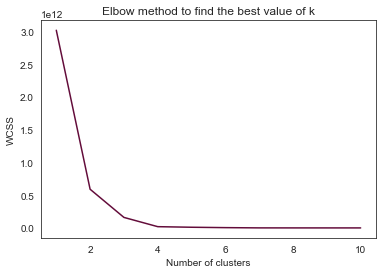

In [2]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
	kmeans=KMeans(n_clusters = i , init = 'k-means++', max_iter=200, n_init=10, random_state=0)
	kmeans.fit(x)
	wcss.append(kmeans.inertia_)
    
plt.title('Elbow method to find the best value of k')
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: x and y must be the same size

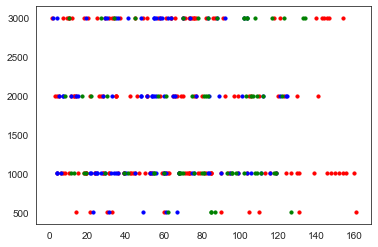

In [9]:
kmeans=KMeans(n_clusters = 4 , init = 'k-means++', max_iter=200, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

#Visualizing the results obtained by plotting scholar id vs income...
plt.scatter(x[y_kmeans==0, 0]%1000, x[y_kmeans==0, 1], s=10, c='red')
plt.scatter(x[y_kmeans==1, 0]%1000, x[y_kmeans==1, 1], s=10, c='blue')
plt.scatter(x[y_kmeans==2, 0]%1000, x[y_kmeans==2, 1], s=10, c='green')
plt.scatter(x[y_kmeans==3, 0]%1000, x[y_kmeans==2, 1], s=10, c='cyan')
plt.title('Group(Cluster) of friends based on K-Means')
plt.xlabel('Scholar_ID mod 100---->')
plt.ylabel('Spending Score----->')
plt.legend()
plt.show()